In [1]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

sys.path.append('../src/features')
import build_features as bf

In [2]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [3]:
targets = pd.DataFrame(originalDF.TARGET.value_counts())

In [4]:
targets['Pct'] = targets['TARGET']/targets['TARGET'].sum()

In [5]:
targets

,TARGET,Pct
0,282686,0.919271
1,24825,0.080729


In [7]:
descriptionsDF = pd.read_csv("../reports/HomeCredit_columns_description.csv")

In [8]:
descriptionsDF[descriptionsDF['Table'] == 'application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [9]:
import seaborn as sns

In [10]:
## Clean up AMT_Income_Total

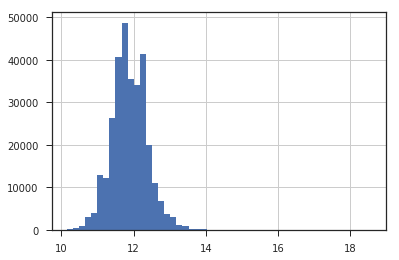

In [11]:
np.log(originalDF['AMT_INCOME_TOTAL']).hist(bins = 50)

In [15]:
amtMean = np.log(originalDF['AMT_INCOME_TOTAL']).mean()
amtStd = np.log(originalDF['AMT_INCOME_TOTAL']).std()

In [16]:
amtMean

11.909237775371254

In [17]:
amtStd

0.48891007919920987

In [ ]:
amt

In [18]:
from sklearn import preprocessing

In [37]:
X_scaled = preprocessing.scale(np.log(originalDF['AMT_INCOME_TOTAL']))

dtype('float64')

In [42]:
logAMT = pd.Series((np.log(originalDF['AMT_INCOME_TOTAL']) - amtMean)/amtStd)
scaledAMT = pd.Series(X_scaled, name= 'scaledLogINC')

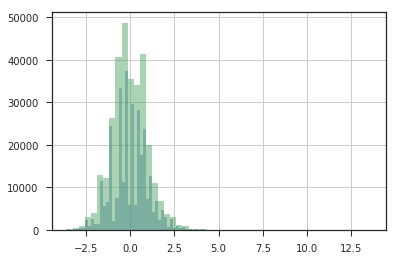

In [44]:
logAMT.hist(bins = 100, alpha = 0.5)
scaledAMT.hist(bins = 50, alpha = 0.5)
plt.legend = True

In [64]:
def normalizeIncome(dfIn):
    """Log transform income and standardize income"""
    nIncome = np.log(dfIn['AMT_INCOME_TOTAL'])
    nIncome.rename('logAMT_INCOME', inplace = True)
    nMean = dfIn['AMT_INCOME_TOTAL'].mean() ## Finds mean
    nStd = dfIn['AMT_INCOME_TOTAL'].std() ## Finds standard deviation
    nIncome = (nIncome - nMean)/nStd ## Standardization
    dfIn = pd.concat([dfIn, nIncome], axis = 1)
    return dfIn

In [47]:
def standardizedIncome(dfIn, dfOut):
    nIncome = pd.Series(preprocessing.scale(np.log(dfIn['AMT_INCOME_TOTAL'])), name = 'scaledLogInc')
    dfOut = pd.concat([dfOut, nIncome], axis = 1)
    return dfOut

In [48]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [50]:
scaledAMT = standardizedIncome(originalDF, scaledAMT)

In [51]:
scaledAMT

,scaledLogINC,scaledLogInc
0,0.632546,0.632546
1,1.220962,1.220962
2,-1.614522,-1.614522
3,-0.196780,-0.196780
4,-0.412281,-0.412281
5,-0.831162,-0.831162
6,0.286722,0.286722
7,1.809378,1.809378
8,-0.569695,-0.569695
9,-0.196780,-0.196780
